In [3]:
import os
import sys
sys.path.append('..')

pip install tensorflow

In [14]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

model = load_model("../saved_models/resnet_model.h5")

X_val = np.load("../data/processed/X_val.npy")
y_val = np.load("../data/processed/y_val.npy")
X_test = np.load("../data/processed/X_test.npy")
y_test = np.load("../data/processed/y_test.npy")

y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))


21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 867ms/step
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       306
           1       0.70      0.86      0.77       363

    accuracy                           0.72       669
   macro avg       0.74      0.71      0.71       669
weighted avg       0.73      0.72      0.72       669



In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

print(classification_report(y_test, y_pred_classes))
print("AUC:", roc_auc_score(y_test, y_pred_probs))


21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 851ms/step
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       306
           1       0.72      0.86      0.79       364

    accuracy                           0.74       670
   macro avg       0.75      0.73      0.73       670
weighted avg       0.75      0.74      0.74       670

AUC: 0.7990106298929829


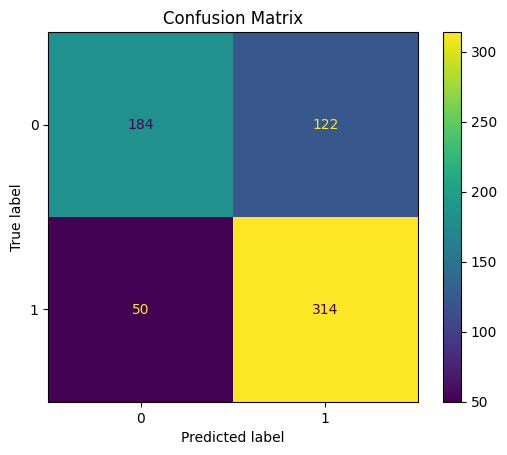

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes)
plt.title("Confusion Matrix")
plt.show()
